# Mask and Social distancing Detection 

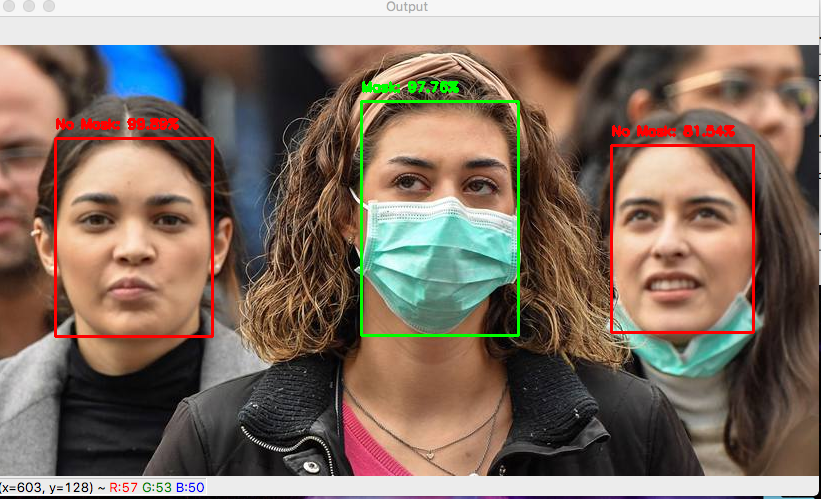

**Social distancing**, also called **“physical distancing,”** means keeping a safe space between yourself and other people who are not from your household.

To practice social or physical distancing, stay at least 6 feet (about 2 arm lengths) from other people who are not from your household in both indoor and outdoor spaces.

**Objective** is to build a Deep Learning model which can identify if the person is wearing a mask or not, also detecting if people vilating social distancing norms.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

import os
import matplotlib.pyplot as plt
import tensorflow as tf


/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2988.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2263.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2427.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/5383.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2790.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/3565.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2425.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/5762.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/855.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1476.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2351.png
/kaggle/input/face-mask-12k-image

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1891.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/3963.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/5697.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2260.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1024.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/4897.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1042.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/2024.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/3909.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/1378.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask/15.png
/kaggle/input/face-mask-12k-images

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_850_3888270.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_348_5679704.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_684_3026577.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_640_6283500.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_290_2810702.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_272_1257404.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_680_2431803.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_79_948721.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/1231.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_436_2899816.png

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_802_3814767.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_608_1539846.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_112_1767118.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_491_1132819.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/585.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_422_1862415.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_292_6710394.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_878_3452056.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_280_3927738.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_802_5137229.pn

/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_173_5723779.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/1644.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_193_9420360.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_491_9931902.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_312_6269835.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_582_4227160.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_166_3999714.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_802_6683297.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_583_5878581.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_417_642739.pn

In [2]:
from scipy.spatial import distance
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
for dirname, _, filenames in os.walk('face_mask_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

face_mask_dataset\haarcascade_frontalface_default.xml
face_mask_dataset\.ipynb_checkpoints\haarcascade_frontalface_default-checkpoint.xml
face_mask_dataset\annotations\maksssksksss0.xml
face_mask_dataset\annotations\maksssksksss1.xml
face_mask_dataset\annotations\maksssksksss10.xml
face_mask_dataset\annotations\maksssksksss100.xml
face_mask_dataset\annotations\maksssksksss101.xml
face_mask_dataset\annotations\maksssksksss102.xml
face_mask_dataset\annotations\maksssksksss103.xml
face_mask_dataset\annotations\maksssksksss104.xml
face_mask_dataset\annotations\maksssksksss105.xml
face_mask_dataset\annotations\maksssksksss106.xml
face_mask_dataset\annotations\maksssksksss107.xml
face_mask_dataset\annotations\maksssksksss108.xml
face_mask_dataset\annotations\maksssksksss109.xml
face_mask_dataset\annotations\maksssksksss11.xml
face_mask_dataset\annotations\maksssksksss110.xml
face_mask_dataset\annotations\maksssksksss111.xml
face_mask_dataset\annotations\maksssksksss112.xml
face_mask_dataset\

### Using haar cascade to detect faces

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. We'll be using a Haar Cascade Model trained to detect faces in order to obtain the bounding box coordinates of faces in an image.

In [4]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('face_mask_dataset/haarcascade_frontalface_default.xml')

In [5]:
# Trying it out on a sample image
img = cv2.imread('face_mask_dataset/images/maksssksksss244.png')

In [6]:
#img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

#if img is None:
#    print('Image not loaded. Check the file path.')
#else:
  #  img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

In [7]:
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

In [8]:
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) # Returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

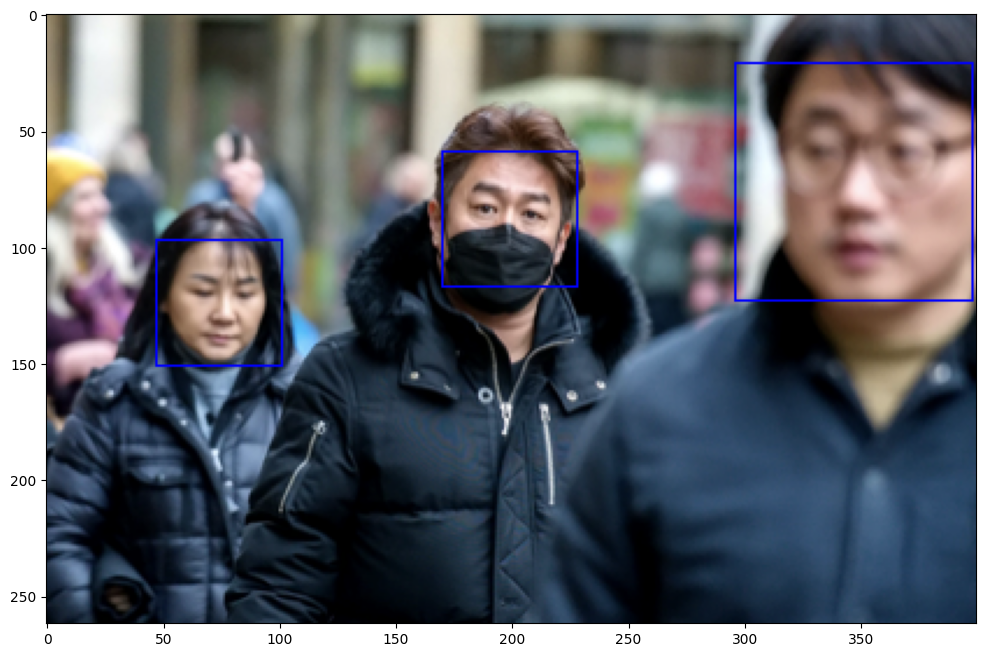

In [9]:
# Plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

### Detecting social distancing violations

This can be done by iterating over the coordinates of faces and calculating the distance for each possible pair, if the distance for a particular pair is less than MIN_DISTANCE then the bounding boxes for those faces are colored red. MIN_DISTANCE must be manually initialized in such a way that it corresponds to the minimum allowable distance in real life (ex. 6ft in India).

In [10]:
MIN_DISTANCE = 130

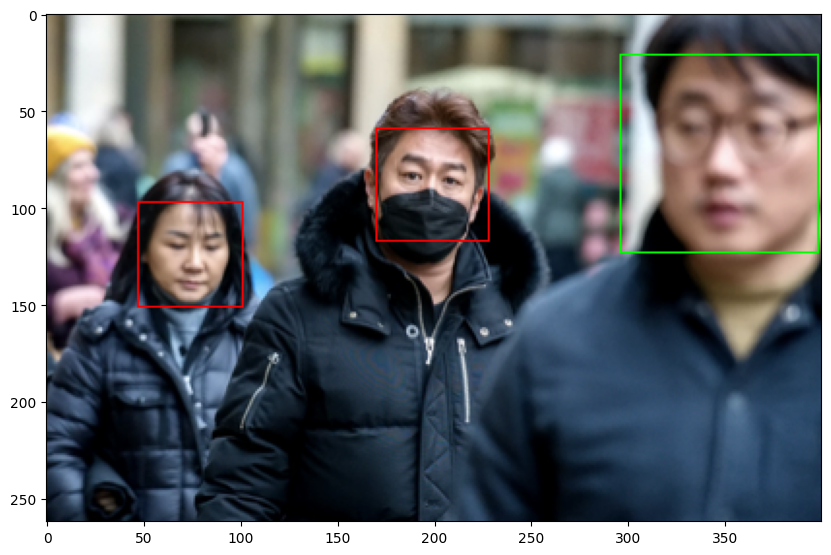

In [11]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

#### Red box shows violation of social distancing.

### Using VGG19 for mask detection


In [12]:
#Load train and test set
train_dir = 'Face Mask Dataset/Train'
test_dir = 'Face Mask Dataset/Test'
val_dir = 'Face Mask Dataset/Validation'

In [13]:
# Data augmentation

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 65 images belonging to 2 classes.
Found 35 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


### Building VGG19 transfer learning model.

In [14]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False

In [15]:
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 4, 4, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        16,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,040,770 (76.45 MB)

 Trainable params: 16,386 (64.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics =["accuracy"])

In [17]:
history = model.fit(train_generator,
                    steps_per_epoch= len(train_generator)//32,
                    epochs=20,validation_data=val_generator,
                    validation_steps=len(val_generator)//32)

C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6404 - loss: 1.5749 - val_accuracy: 0.4000 - val_loss: 0.9415
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5641 - loss: 0.8780 - val_accuracy: 0.5714 - val_loss: 1.0303
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4922 - loss: 0.9710 - val_accuracy: 0.8571 - val_loss: 0.5027
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8846 - loss: 0.3730 - val_accuracy: 0.8000 - val_loss: 0.4427
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9385 - loss: 0.2665 - val_accuracy: 0.8571 - val_loss: 0.4020
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9458 - loss: 0.2204 - val_accuracy: 0.8286 - val_loss: 0.3745
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9846 - loss: 0.1960 - val_accuracy: 0.8000 - val_loss: 0.3924
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9615 - loss: 0.1655 - val_accuracy: 0.8286 - val_loss: 0.2854
Epoch 9/20
3/3 ━

In [18]:
model.evaluate(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.8631 - loss: 0.1959


[0.20510926842689514, 0.8571428656578064]

### Our modela achieved 97% accuracy on test data.

### Testing the model on the test data

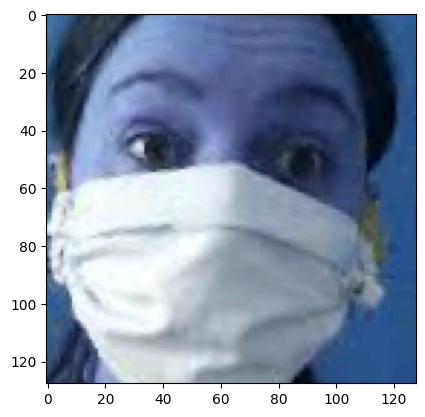

In [19]:
sample_mask_img = cv2.imread('Face Mask Dataset/Test/WithMask/Augmented_96_996275.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [20]:
model.predict(sample_mask_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


array([[0.6259459 , 0.18922979]], dtype=float32)

The model is able to classify if the person is wearing a mask or not.

### Save the model.

In [21]:
model.save('masknet.h5')

### Integrating with haar cascade

We now take crops of the faces detected in the image and use the model trained in the above section to determine whether the individual faces have a mask or not.

In [22]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


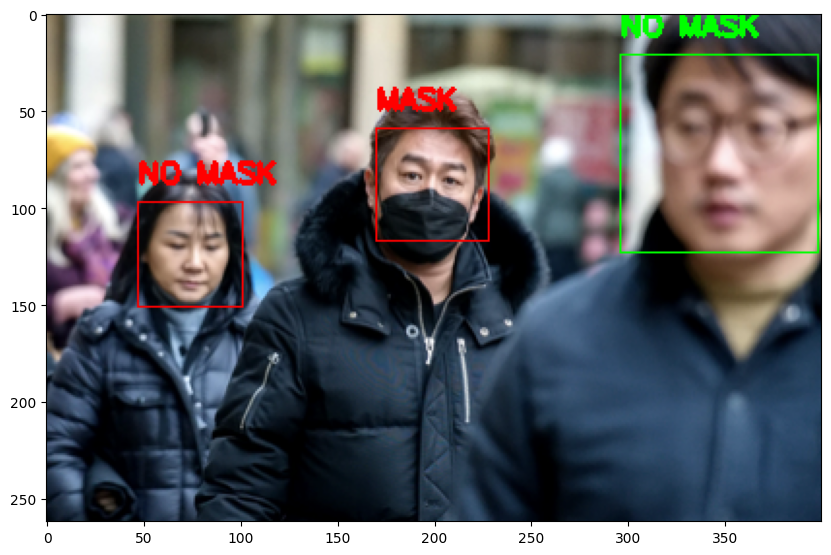

In [23]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

#### Red boxes shows violation of social distancing.